In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

C:\Users\lukas\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\lukas\AppData\Local\Temp\ipykernel_2560\3543669390.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\lukas\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\lukas\AppData\Local\Temp\ipykernel_2560\3543669390.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


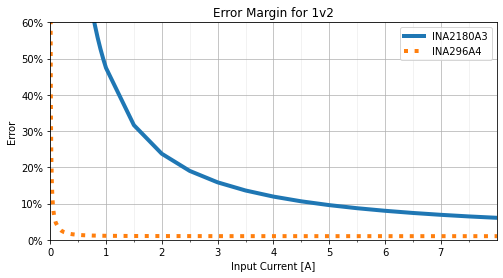

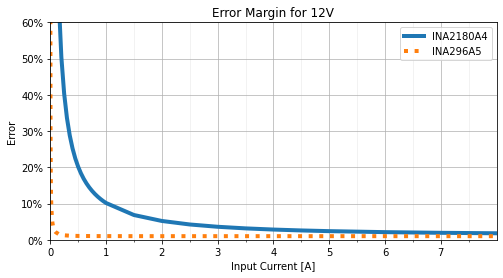

In [3]:
"""
Separate figures for 1.2V and 12V, each with INA2180Ax and INA296Ax
"""

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

for name, devices in zip(["1v2", "12V"], [["INA2180A3", "INA296A4"], ["INA2180A4", "INA296A5"]]):
    df = pd.read_excel(f"Error_Analysis_{name}.xlsm", sheet_name=1, usecols="P:BA", skiprows=range(9))
    df = df.iloc[:-4]
    fig, ax = plt.subplots(figsize=(8,4))
    for suffix, amplifier, color, linestyle in zip(["", ".2"], devices, ["tab:blue", "tab:orange"], ["solid", "dotted"]):
        ax.plot(df["ISHUNT"], df["Error" + suffix], c=color, linestyle=linestyle, label=amplifier, linewidth=4)

    ax.set_ylim(0, 0.6)
    ax.set_xlim(0, 8)
    ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1], 1))
    ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1], 0.5), minor=True)

    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.legend()
    ax.set_ylabel("Error")
    ax.set_xlabel("Input Current [A]")
    ax.grid(which="minor", alpha=.2)
    ax.grid(which="major", alpha=.9)
    ax.set_title(f"Error Margin for {name}")
    fig.show()

In [4]:
import matplotlib as m
m.rcParams.update({"font.size": 24, "legend.fontsize": 20, 'pdf.fonttype': 42, 'ps.fonttype': 42})


C:\Users\lukas\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\lukas\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\lukas\AppData\Local\Temp\ipykernel_2560\358301787.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


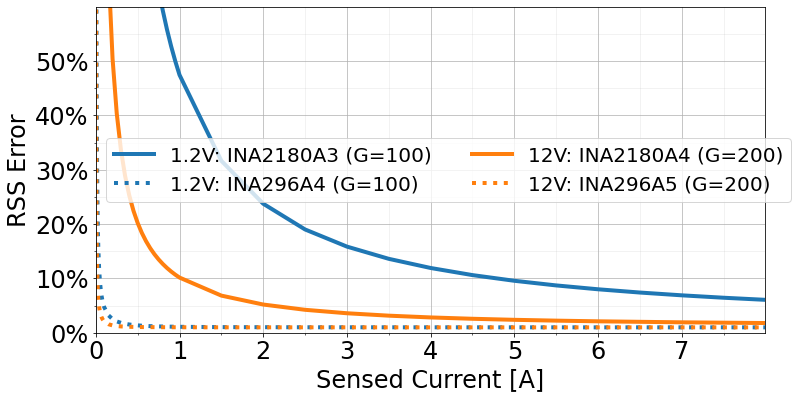

In [5]:
"""
Combined for 1.2V and 12V with INA2180Ax and INA296Ax
"""

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
fig, ax = plt.subplots(figsize=(12,6))
for name, devices, color in zip(["1V2", "12V"], [["INA2180A3 (G=100)", "INA296A4 (G=100)"], ["INA2180A4 (G=200)", "INA296A5 (G=200)"]], ["tab:blue", "tab:orange"]):
    df = pd.read_excel(f"Error_Analysis_{name}.xlsm", sheet_name=1, usecols="P:BA", skiprows=range(9))
    df = df.iloc[:-4]
    displayname = "1.2V" if name == "1V2" else name
    for suffix, amplifier, linestyle in zip(["", ".2"], devices, ["solid", "dotted"]):
        ax.plot(df["ISHUNT"], df["Error" + suffix], c=color, linestyle=linestyle, label=f"{displayname}: {amplifier}", linewidth=4)

ax.set_ylim(0, 0.6)
ax.set_xlim(0, 8)
ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1], 1))
ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1], 0.5), minor=True)

ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1], 0.1))
ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1], 0.05), minor=True)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(ncol=2)
ax.set_ylabel("RSS Error")
ax.set_xlabel("Sensed Current [A]")
ax.grid(which="minor", alpha=.2)
ax.grid(which="major", alpha=.9)
fig.show()
fig.savefig("error_margin_analysis.pdf", bbox_inches="tight")

C:\Users\lukas\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\lukas\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\lukas\AppData\Local\Temp\ipykernel_2560\2066889218.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


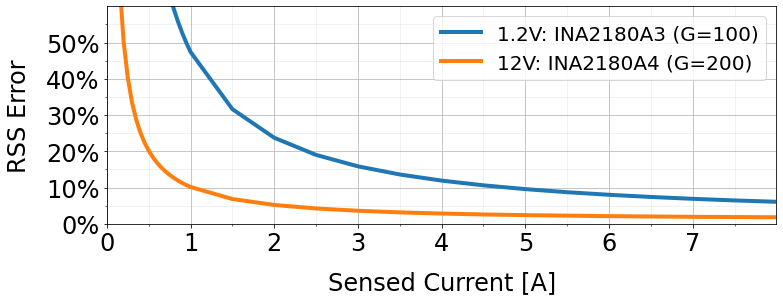

In [6]:
"""
Combined figure for 1.2V and 12V with INA2180Ax (used for the main measurements)
"""

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
fig, ax = plt.subplots(figsize=(12,4))
for name, devices, color in zip(["1V2", "12V"], [["INA2180A3 (G=100)"], ["INA2180A4 (G=200)"]], ["tab:blue", "tab:orange"]):
    df = pd.read_excel(f"Error_Analysis_{name}.xlsm", sheet_name=1, usecols="P:BA", skiprows=range(9))
    df = df.iloc[:-4]
    displayname = "1.2V" if name == "1V2" else name
    for suffix, amplifier, linestyle in zip(["", ".2"], devices, ["solid", "dotted"]):
        ax.plot(df["ISHUNT"], df["Error" + suffix], c=color, linestyle=linestyle, label=f"{displayname}: {amplifier}", linewidth=4)

ax.set_ylim(0, 0.6)
ax.set_xlim(0, 8)
ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1], 1))
ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1], 0.5), minor=True)

ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1], 0.1))
ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1], 0.05), minor=True)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(ncol=1)
ax.set_ylabel("RSS Error", labelpad=15)
ax.set_xlabel("Sensed Current [A]", labelpad=15)
ax.grid(which="minor", alpha=.2)
ax.grid(which="major", alpha=.9)
fig.show()
fig.savefig("error_margin_analysis.pdf", bbox_inches="tight")